<img src='projet3bis.PNG'>

# Sommaire :
**Partie 1 : Importation des librairies et de jeu de données**

 - <a href="#C1">Importation des librairies et de jeu de données</a>
 
**Partie 2 : Inspection de qualité de jeu de données**
 - <a href="#C2">Inspection de qualité de jeu de données</a>
 
**Partie 3 :  Nettoyage de jeu de données**
 - <a href="#C3">Nettoyage de jeu de données</a>



# <a name="C1">Importation des librairies et de jeu de données</a>

# <a name="C1">Partie 1: Importation de librairies et de jeu données</a>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

from scipy.stats import kstest
from scipy.stats import ks_2samp

import statsmodels.api as sm



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
df=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <a name="C2">Partie 2: Inspection de qualité de jeu donné</a>

### Inspection de qualité de jeu donnés :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


### Nombre de Lignes et de colonnes:

320772 lignes ==> un nombre très élèvé d'individus ! <br>
162 colonnes ==> un nombre très élèvé de caractérstiques !

### Vérification de type de données:

In [4]:
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

==> les types des objets utilisés sont respectés. Pas conversion à faire.

### Doublons :

In [5]:
df.duplicated().sum()

0

==> pas des doublons

### Nombre des valeurs manquants :

In [6]:
df.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

==> Beaucoup des valeurs nulles.

# <a name="C3">Partie 3: Nettoyage de jeu de données </a>


Sélection  des variables et d'individus nécessaire à notre étude sur la qualité des produits alimentaires vis à vis au apport de gras.

### Sélection  des colonnes en rapport avec l'étude de taux de gras dans les aliments

In [7]:
listeColonnes = list(df.columns)

In [8]:
listeColonnes

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [9]:
dfP3=df[['nutrition_grade_fr', 'pnns_groups_1', 'product_name','fat_100g', 'saturated-fat_100g' ,'lauric-acid_100g' , 'myristic-acid_100g' , 'palmitic-acid_100g' , 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'nutrition-score-fr_100g']]


### Seconde sélection  sur les colonnes en fonction de valeurs indiquées 

In [10]:
dfP3.describe()

,fat_100g,saturated-fat_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g,nutrition-score-fr_100g
count,243891.000000,229554.000000,4.000000,1.0,1.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,21.000000,143298.000000,144090.000000,221210.000000
mean,12.730379,5.129932,36.136182,18.9,8.1,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,40.192857,0.073476,0.020071,9.165535
std,17.578747,8.014238,24.101433,NaN,NaN,17.076167,10.832591,5.607988,7.971418,13.927752,1.978192,17.512632,6.494183,25.175674,1.540223,0.358062,9.055903
min,0.000000,0.000000,0.044730,18.9,8.1,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,1.000000,-3.570000,0.000000,-15.000000
25%,0.000000,0.000000,34.661183,18.9,8.1,0.000000,0.000000,0.600000,0.068750,0.200000,0.171500,1.850000,0.437000,27.000000,0.000000,0.000000,1.000000
50%,5.000000,1.790000,47.600000,18.9,8.1,4.000000,2.220000,1.800000,0.117500,0.500000,0.800000,10.050000,0.647000,31.000000,0.000000,0.000000,10.000000
75%,20.000000,7.140000,49.075000,18.9,8.1,10.710000,7.140000,3.200000,0.604000,0.715750,3.300000,23.000000,3.600000,68.000000,0.000000,0.020000,16.000000
max,714.290000,550.000000,49.300000,18.9,8.1,557.140000,98.000000,60.000000,75.000000,85.000000,12.000000,71.000000,25.000000,75.000000,369.000000,95.238000,40.000000


==> certaines colonnes n'ont qu'une valeur renseignée ! Pas d'interet !!

In [11]:
dfP3=dfP3.drop(['lauric-acid_100g' , 'myristic-acid_100g' , 'palmitic-acid_100g' , 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'linoleic-acid_100g', 'nutrition-score-fr_100g'], axis=1)

In [12]:
dfP3.isnull().sum()

nutrition_grade_fr           99562
pnns_groups_1               229259
product_name                 17762
fat_100g                     76881
saturated-fat_100g           91218
monounsaturated-fat_100g    297949
polyunsaturated-fat_100g    297913
omega-3-fat_100g            319931
omega-6-fat_100g            320584
omega-9-fat_100g            320751
trans-fat_100g              177474
cholesterol_100g            176682
dtype: int64

### Sélection sur les individus : 
Selection des individus ayant au moins 5 observations statistiques renseignées

In [13]:
dfP3=dfP3.dropna(thresh= 5,subset=[ 'fat_100g',
       'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g',
       'omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g'])

In [14]:
dfP3.isnull().sum()

nutrition_grade_fr           2522
pnns_groups_1               20544
product_name                   39
fat_100g                       37
saturated-fat_100g             23
monounsaturated-fat_100g       91
polyunsaturated-fat_100g       97
omega-3-fat_100g            21136
omega-6-fat_100g            21409
omega-9-fat_100g            21532
trans-fat_100g                789
cholesterol_100g              764
dtype: int64

### Suppression des doublons 

In [15]:
dfP3.duplicated().sum()

3248

In [16]:
dfP3.drop_duplicates(keep='first',inplace=True)

In [17]:
dfP3.isnull().sum()

nutrition_grade_fr           1756
pnns_groups_1               17318
product_name                   38
fat_100g                       36
saturated-fat_100g             22
monounsaturated-fat_100g       91
polyunsaturated-fat_100g       90
omega-3-fat_100g            17898
omega-6-fat_100g            18165
omega-9-fat_100g            18284
trans-fat_100g                724
cholesterol_100g              690
dtype: int64

### Pour nos besoins métiers : éliminer tous les produits non catégorisés

In [18]:
dfP3.drop(dfP3[dfP3['pnns_groups_1'].isna()].index, inplace=True)


In [19]:
unknowPnns = dfP3.loc[dfP3['pnns_groups_1']=='unknown']
dfP3.drop(unknowPnns.index, axis= 0 ,inplace=True)


In [20]:
dfP3.isnull().sum()

nutrition_grade_fr           93
pnns_groups_1                 0
product_name                  4
fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g     20
polyunsaturated-fat_100g     18
omega-3-fat_100g            455
omega-6-fat_100g            653
omega-9-fat_100g            755
trans-fat_100g              472
cholesterol_100g            381
dtype: int64

### Liste de catégories à étudier :

In [21]:
dfP3['pnns_groups_1'].value_counts()

Fat and sauces             198
Fish Meat Eggs             153
Sugary snacks              114
Cereals and potatoes       106
Salty snacks                67
Beverages                   51
Milk and dairy products     38
Composite foods             25
Fruits and vegetables        9
sugary-snacks                9
fruits-and-vegetables        3
Name: pnns_groups_1, dtype: int64

==> regroupement de deux catégories identique en une seule categorie. 
'Fruits and vegetables' + 'fruits-and-vegetables' ==> 'Fruits and vegetables'

In [22]:
dfP3.loc[dfP3['pnns_groups_1']=='fruits-and-vegetables', 'pnns_groups_1'] ='Fruits and vegetables'

### Gestion de valeurs aberrantes :


#### Taux supérieur à 100 dans 100 grammes de nutriment
Transformer les valeurs supérieures à 100 en NaN.

In [23]:
pd.options.mode.chained_assignment = None 

listeIndicateursNumerique = ['fat_100g','saturated-fat_100g', 'monounsaturated-fat_100g','polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'omega-6-fat_100g','omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g']

for indic in listeIndicateursNumerique :
    dfP3[indic]= dfP3[indic].apply(lambda x: np.nan if x > 100 else x)

In [24]:
 dfP3.head()

,nutrition_grade_fr,pnns_groups_1,product_name,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g
180,c,Sugary snacks,Chaussons tressés aux pommes,10.70,2.00,3.33,5.33,NaN,NaN,NaN,0.667,0.00533
1719,b,Cereals and potatoes,White enriched bread,1.79,0.00,0.00,0.00,NaN,NaN,NaN,0.000,0.00000
1727,b,Cereals and potatoes,Light Rye,2.22,1.11,0.00,0.00,NaN,NaN,NaN,0.000,0.00000
1947,b,Cereals and potatoes,Hamburger enriched buns,2.33,0.00,0.00,0.00,NaN,NaN,NaN,0.000,0.00000
2764,b,Salty snacks,Sliced Almonds,50.00,3.33,33.30,10.00,NaN,NaN,NaN,0.000,0.00000


In [25]:
dfP3.isnull().sum()

nutrition_grade_fr           93
pnns_groups_1                 0
product_name                  4
fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g     20
polyunsaturated-fat_100g     18
omega-3-fat_100g            455
omega-6-fat_100g            653
omega-9-fat_100g            755
trans-fat_100g              472
cholesterol_100g            381
dtype: int64

### Visualisation de répartition des valeurs par catégorie

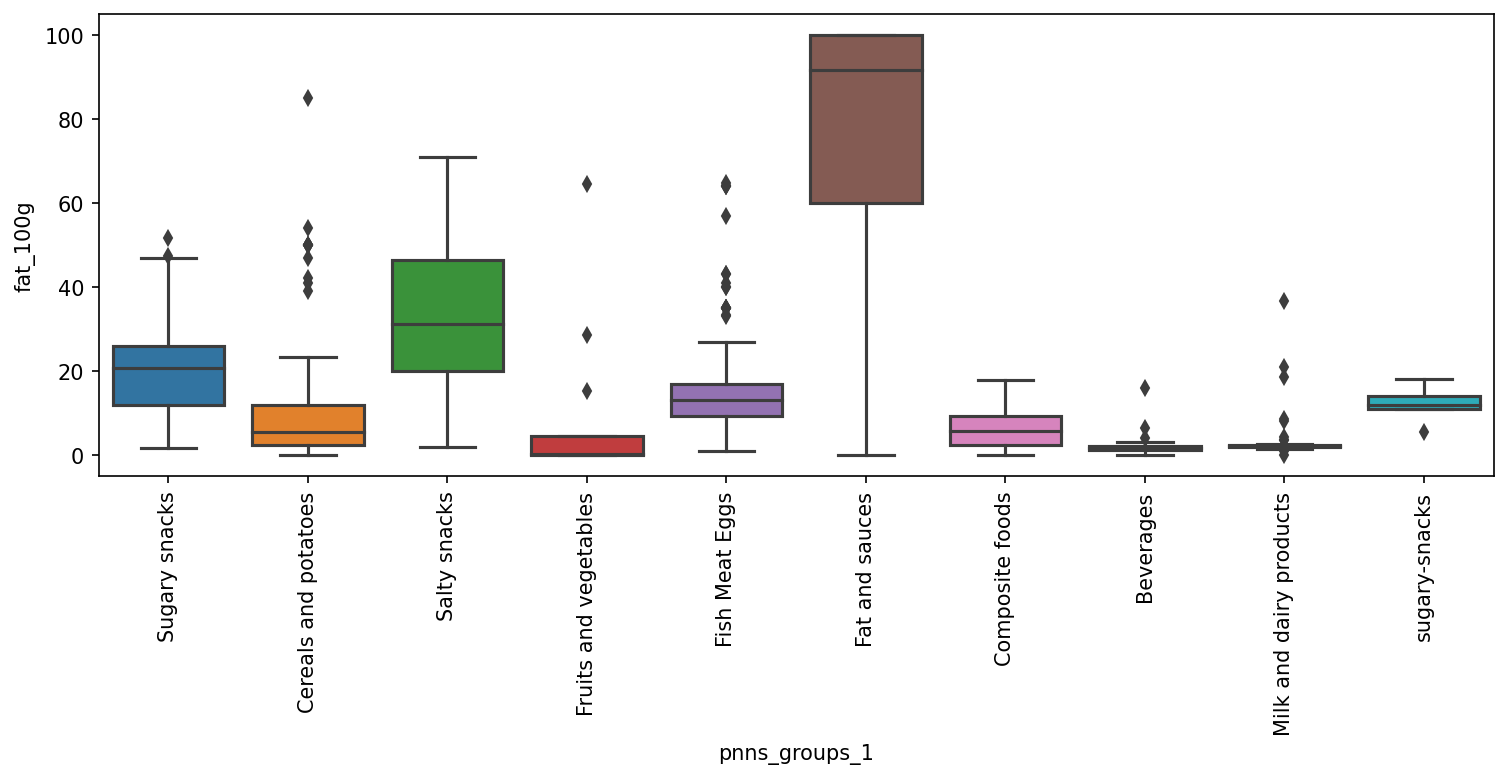

In [26]:
plt.figure(figsize=(12,4), dpi=150)
sns.boxplot(data=dfP3,y='fat_100g', x='pnns_groups_1')
plt.xticks(rotation=90);
plt.savefig('RepartitionValeursAberantes.png',bbox_inches='tight')

Certaines categories contiennent des valeurs abérantes ( > 75ième percentiles ) !

#### Vérifcation :

In [27]:
#Cereals and potatoes
dfP3.loc[dfP3['pnns_groups_1']=='Cereals and potatoes',['fat_100g','product_name']].sort_values(by='fat_100g').tail(10)

,fat_100g,product_name
311296,41.0,Lino dorado &quot;Deliplus&quot;
256734,42.2,Leinsamen ganz
98750,46.9,Creamy Peanut Butter
116342,50.0,Паста Арахисовая Мягкая (Creamy)
62528,50.0,Natural peanut butter
28884,50.0,Earth Balance Coconut & Peanut Spread
28880,50.0,Natural peanut butter and flaxseed
62634,50.0,Organic no stir Peanut Butter creamy
319637,54.0,Peanut Butter Crunchy - No added Salt
197544,85.0,Lécithine de soja


 ===>les 5 valeurs aberrantes sont vérifiées. Tous ces produits contiennent de cacahouète et présentent des valeurs correctes de taux d'acide gras.

In [28]:
#Fish Meat Eggs 
dfP3.loc[dfP3['pnns_groups_1']=='Fish Meat Eggs',['fat_100g','product_name']].sort_values(by='fat_100g').tail(10)

,fat_100g,product_name
311836,40.0,Foie de Morue goût fumé
281797,40.0,Foie de morue fumé au feu de bois
225018,41.0,Foie de morue fumé
208484,43.0,Foie de Morue Goût fumé
199306,43.0,Foie de morue goût fumé
281494,56.9,Foie de morue
214675,64.0,Foie de morue nature au sel de Guérande
214674,64.0,Foie de morue Nature au Citron
214580,64.0,Foie de morue
251878,64.9,Foie de morue au naturel


 ===>les valeurs aberrantes correspondent aux produits à la base du foie de morue qui sont un produit extrêmement gras et le taux varie légèrement en fonction de son conditionnement. Ces produits affichent donc présentent des valeurs correctes de taux d'acide gras.

In [29]:
#Fruits and vegetables 
dfP3.loc[dfP3['pnns_groups_1']=='Fruits and vegetables',['fat_100g','product_name']].sort_values(by='fat_100g').tail(10)

,fat_100g,product_name
319074,0.1,Champignons Mushrooms Pieces and Stems
319075,0.1,Homebrand Whole Champignons Mushrooms
311188,0.2,Dátiles sin hueso &quot;Hacendado&quot;
318968,0.3,Woolworths Select Winter Vegetable Mix
319106,0.3,Sliced Green Beans
307702,0.9,Higos secos &quot;Casa Pons&quot;
311191,0.9,Higos secos &quot;Hacendado&quot;
187364,15.3,Olives vertes dénoyautées
110203,28.6,Kahuna Crunch Trail Mix
311154,64.5,Coco rallado


===>les trois valeurs aberrantes. Taux vérifiés ==> valeurs correctes

In [30]:
#Milk and dairy products
dfP3.loc[dfP3['pnns_groups_1']=='Milk and dairy products',['fat_100g','product_name']].sort_values(by='fat_100g').tail(10)

,fat_100g,product_name
220919,2.4,"Dessert végétal aux morceaux de fruits, Poire ..."
221093,2.7,Sojasun Natural
227723,3.6,Lait entier stérilisé U.H.T.
236894,3.6,GrandLait Pleine Saveur Entier
255391,4.3,lait frais entier pasteurisé
303243,8.2,Il gelato 8 sandwich
311279,8.7,Polos de soja con chocolate &quot;Hacendado&qu...
303242,18.7,Polos de soja recubiertos con chocolate &quot;...
229261,21.0,Camembert Fermier
318979,36.6,Sour Cream For Dolloping and Cooking


==> valeurs verifiées et correctes

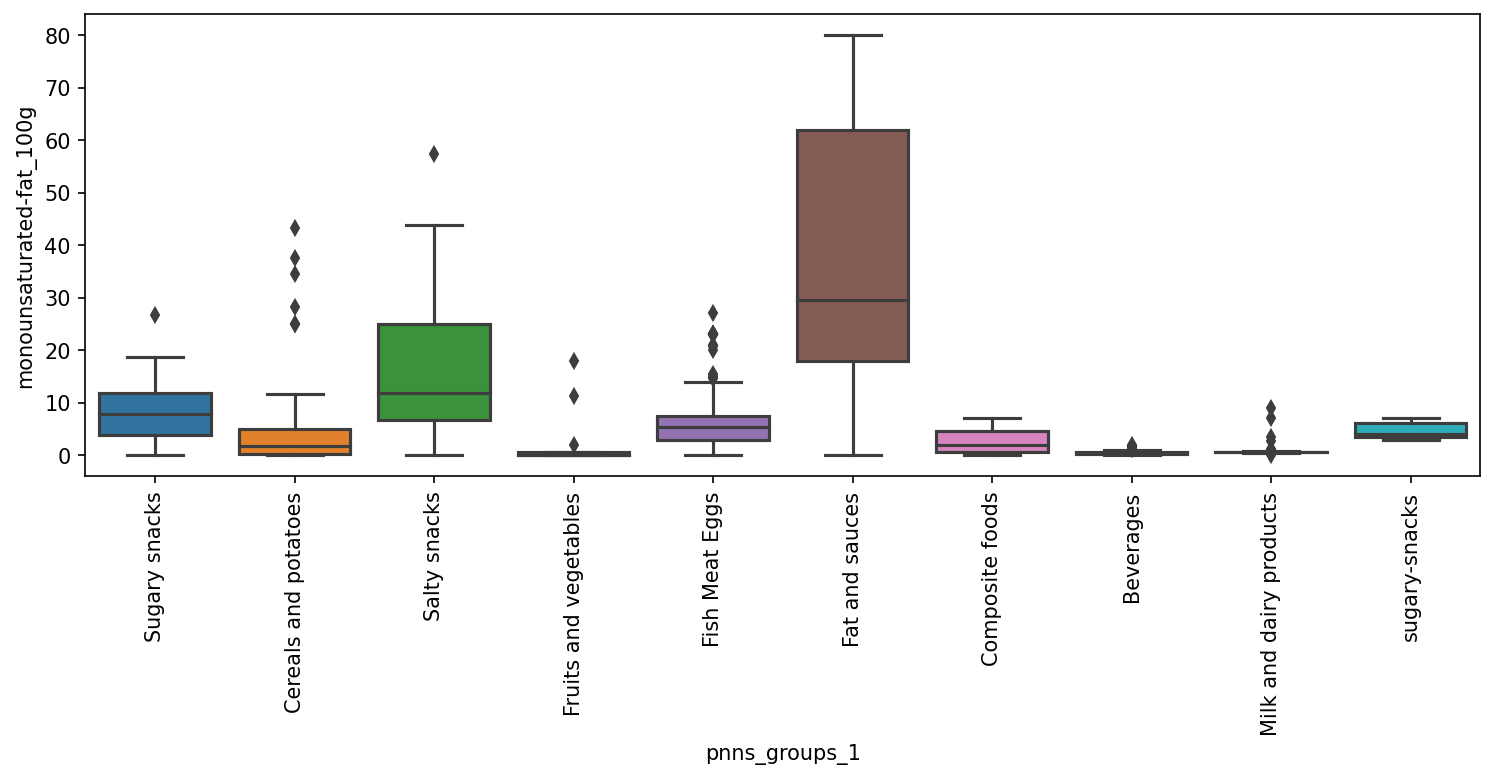

In [31]:
plt.figure(figsize=(12,4), dpi=150)
sns.boxplot(data=dfP3,y='monounsaturated-fat_100g', x='pnns_groups_1')
plt.xticks(rotation=90);
plt.savefig('RepartitionValeursAberantesMonoUns.png',bbox_inches='tight')

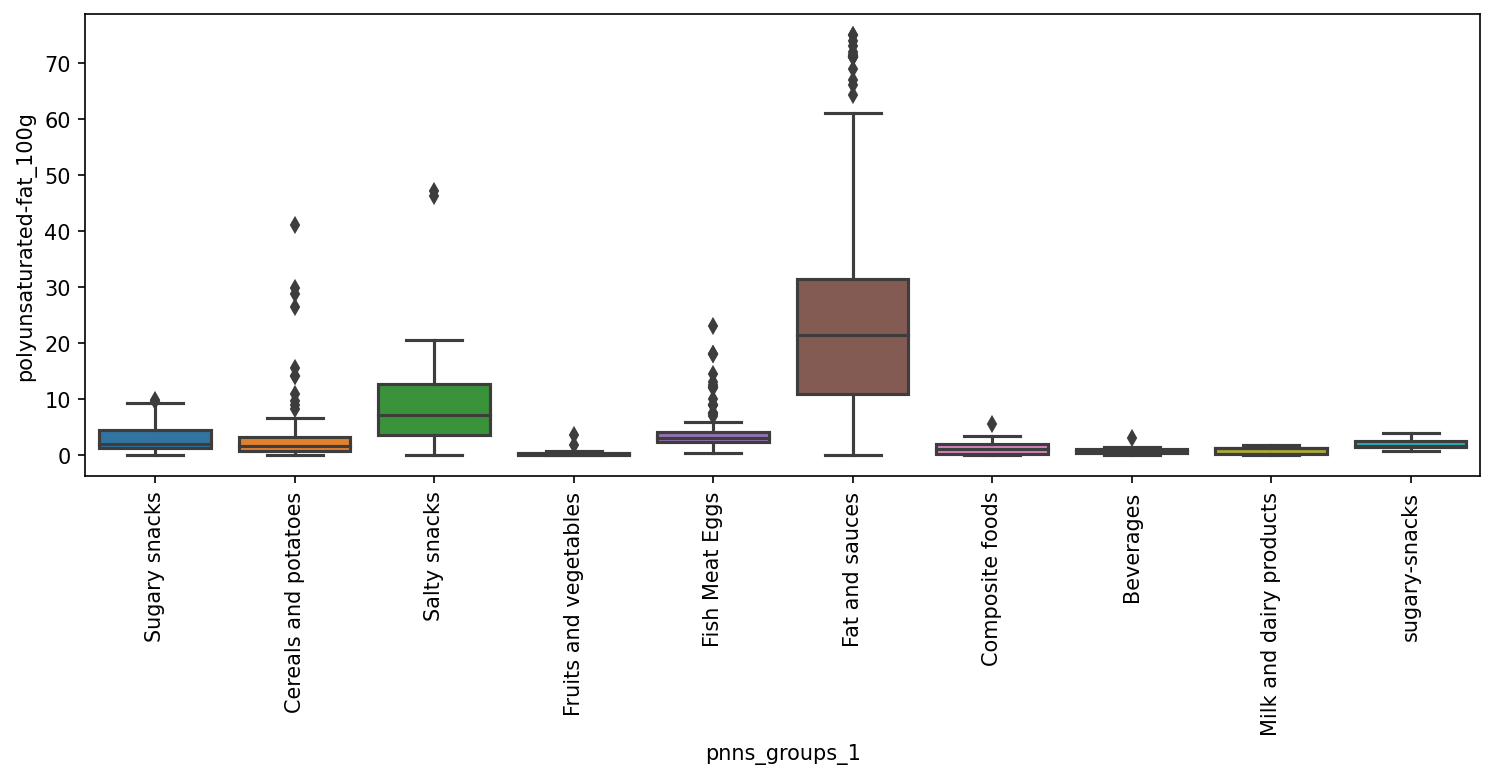

In [32]:
plt.figure(figsize=(12,4), dpi=150)
sns.boxplot(data=dfP3,y='polyunsaturated-fat_100g', x='pnns_groups_1')
plt.xticks(rotation=90);
plt.savefig('RepartitionValeursAberantesPolyUns.png',bbox_inches='tight')

In [33]:
#Fat and sauces
dfP3.loc[dfP3['pnns_groups_1']=='Fat and sauces',['fat_100g','product_name']].sort_values(by='fat_100g').tail(100)

,fat_100g,product_name
264441,91.6,Jordan Olivenöl
241311,91.7,Huile de colza
270141,92.0,Crisp -n Dry Vegetable Oil 100% Rapeseed Oil
239226,92.0,Huile d'olive vierge extra Bio Carrefour
318747,92.0,Vegetable Oil
...,...,...
217599,100.0,Isio 4
217604,100.0,Frial
234019,100.0,Huile vierge de noix
250741,100.0,Mélange 6 huiles


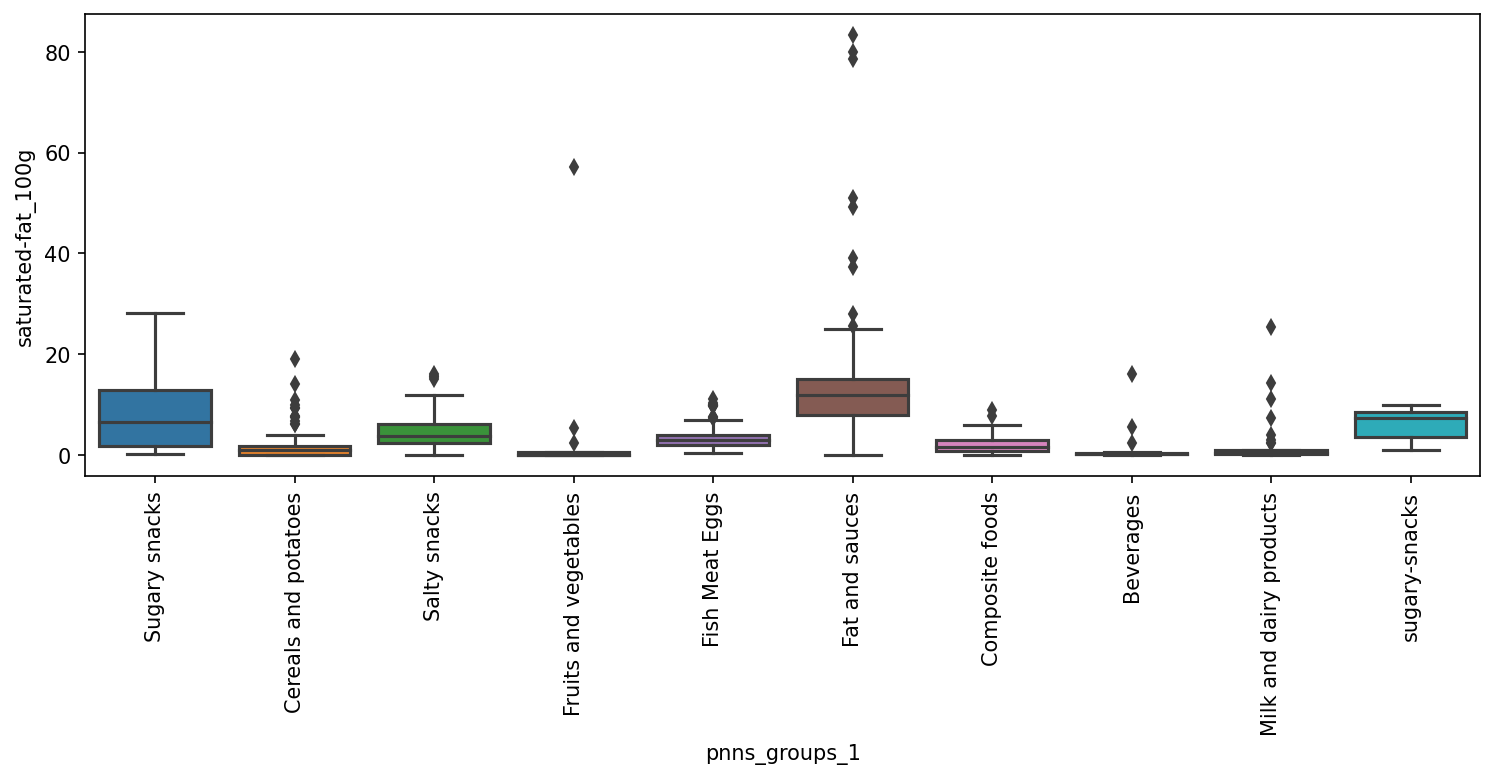

In [34]:
plt.figure(figsize=(12,4), dpi=150)
sns.boxplot(data=dfP3,y='saturated-fat_100g', x='pnns_groups_1')
plt.xticks(rotation=90);

Hormis la ctaégorie 'Fat and sauces' ,nous remarquons que ce sont les mêmes catégories qui affichent des valeurs aberrantes pour l'acide gras saturé, monoinsaturé et polyinsaturé que ceux de taux d'acide gras total. Nous pourrions supposer qu'il s'agit de mêmes produits et conclure que ces valeurs sont correctes.

Notons que vu la nature des produits dans la catégorie 'Fat and sauces', il est comprenhensible qu'ils affichent une telle variation.

## Gestion de valeurs nulles ou NaN

In [35]:
dfP3.isnull().sum()

nutrition_grade_fr           93
pnns_groups_1                 0
product_name                  4
fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g     20
polyunsaturated-fat_100g     18
omega-3-fat_100g            455
omega-6-fat_100g            653
omega-9-fat_100g            755
trans-fat_100g              472
cholesterol_100g            381
dtype: int64

#### 1 Suppression des produits sans nom: aucun intérêt métier

In [36]:
dfP3.drop(dfP3[dfP3['product_name'].isna()].index, inplace=True)


In [37]:
dfP3.isnull().sum()

nutrition_grade_fr           91
pnns_groups_1                 0
product_name                  0
fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g     20
polyunsaturated-fat_100g     18
omega-3-fat_100g            451
omega-6-fat_100g            649
omega-9-fat_100g            751
trans-fat_100g              472
cholesterol_100g            381
dtype: int64

#### 2 Déterminer la valeur monounsaturated-fat_100g et polyunsaturated-fat_100g à partir de la rélation : 
       fat_100g = saturated-fat_100g + monounsaturated-fat_100g + polyunsaturated-fat_100g

In [38]:
#creer une fonction
#apply avec plusieurs colonnes !!
def mono( fat,sat,poly):
    return fat-sat-poly
dfP3['monounsaturated-fat_100g']= dfP3[['fat_100g','saturated-fat_100g','polyunsaturated-fat_100g']].apply(lambda dfP3: mono(dfP3['fat_100g'],dfP3['saturated-fat_100g'],dfP3['polyunsaturated-fat_100g']), axis=1)

In [39]:
dfP3['monounsaturated-fat_100g'].isnull().sum()

18

In [40]:
dfP3.isnull().sum()

nutrition_grade_fr           91
pnns_groups_1                 0
product_name                  0
fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g     18
polyunsaturated-fat_100g     18
omega-3-fat_100g            451
omega-6-fat_100g            649
omega-9-fat_100g            751
trans-fat_100g              472
cholesterol_100g            381
dtype: int64

In [41]:
def poly( fat, sat,mono):
    return fat-sat-mono

In [42]:
dfP3['polyunsaturated-fat_100g']=dfP3[['fat_100g','saturated-fat_100g','monounsaturated-fat_100g']].apply(lambda dfP3: poly(dfP3['fat_100g'],dfP3['saturated-fat_100g'], dfP3['monounsaturated-fat_100g']), axis=1)
#une autre syntaxe pour exactement le meme résultat et en plus avec un calcul plus rapide pour les fonction customisées:
#dfP3['polyunsaturated-fat_100g']=np.vectorize(poly)(dfP3['fat_100g'],dfP3['saturated-fat_100g'],dfP3['monounsaturated-fat_100g'])

In [43]:
dfP3.isnull().sum()

nutrition_grade_fr           91
pnns_groups_1                 0
product_name                  0
fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g     18
polyunsaturated-fat_100g     18
omega-3-fat_100g            451
omega-6-fat_100g            649
omega-9-fat_100g            751
trans-fat_100g              472
cholesterol_100g            381
dtype: int64

#### 4 Déterminer la valeur de Omega 9 à partir de la rélation suivante : 
Sacant que :
   omega-9-fat_100g = monounsaturated-fat_100g <br>
Nous pouvons donc deduire certaines valeurs :

In [44]:
dfP3['omega-9-fat_100g']=dfP3['monounsaturated-fat_100g']

In [45]:
dfP3.head()

,nutrition_grade_fr,pnns_groups_1,product_name,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g
180,c,Sugary snacks,Chaussons tressés aux pommes,10.70,2.00,3.37,5.33,NaN,NaN,3.37,0.667,0.00533
1719,b,Cereals and potatoes,White enriched bread,1.79,0.00,1.79,0.00,NaN,NaN,1.79,0.000,0.00000
1727,b,Cereals and potatoes,Light Rye,2.22,1.11,1.11,0.00,NaN,NaN,1.11,0.000,0.00000
1947,b,Cereals and potatoes,Hamburger enriched buns,2.33,0.00,2.33,0.00,NaN,NaN,2.33,0.000,0.00000
2764,b,Salty snacks,Sliced Almonds,50.00,3.33,36.67,10.00,NaN,NaN,36.67,0.000,0.00000


In [46]:
dfP3.isnull().sum()

nutrition_grade_fr           91
pnns_groups_1                 0
product_name                  0
fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g     18
polyunsaturated-fat_100g     18
omega-3-fat_100g            451
omega-6-fat_100g            649
omega-9-fat_100g             18
trans-fat_100g              472
cholesterol_100g            381
dtype: int64

#### 4 Remplacer les NaN par la moyenne de chaque catégorie

In [47]:
dfP3['monounsaturated-fat_100g'] = df.groupby('pnns_groups_1')['monounsaturated-fat_100g'].transform(lambda x: x.fillna(x.mean()))
dfP3['polyunsaturated-fat_100g'] = df.groupby('pnns_groups_1')['polyunsaturated-fat_100g'].transform(lambda x: x.fillna(x.mean()))
dfP3['omega-3-fat_100g'] = df.groupby('pnns_groups_1')['omega-3-fat_100g'].transform(lambda x: x.fillna(x.mean()))
dfP3['omega-6-fat_100g'] = df.groupby('pnns_groups_1')['omega-6-fat_100g'].transform(lambda x: x.fillna(x.mean()))
#dfP3['omega-9-fat_100g'] = df.groupby('pnns_groups_1')['omega-9-fat_100g'].transform(lambda x: x.fillna(x.mean()))
dfP3['trans-fat_100g'] = df.groupby('pnns_groups_1')['trans-fat_100g'].transform(lambda x: x.fillna(x.mean()))
dfP3['cholesterol_100g'] = df.groupby('pnns_groups_1')['cholesterol_100g'].transform(lambda x: x.fillna(x.mean()))


In [48]:
dfP3['omega-9-fat_100g']=dfP3['monounsaturated-fat_100g']

In [49]:
dfP3.isnull().sum()

nutrition_grade_fr          91
pnns_groups_1                0
product_name                 0
fat_100g                     0
saturated-fat_100g           0
monounsaturated-fat_100g     0
polyunsaturated-fat_100g     0
omega-3-fat_100g            12
omega-6-fat_100g            21
omega-9-fat_100g             0
trans-fat_100g               0
cholesterol_100g             0
dtype: int64

In [50]:
dfP3['pnns_groups_1'].unique()

array(['Sugary snacks', 'Cereals and potatoes', 'Salty snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Fat and sauces',
       'Composite foods', 'Beverages', 'Milk and dairy products',
       'sugary-snacks'], dtype=object)

### Besoins metier


Les acides gras Oméga-6 sont  considérés comme des graisses favorables car ils ont un effet hypocholestérolémiant. On les trouve principalement dans les huiles alimentaires végétales (tournesol, mais, pépins de raisins). Mais consommés en excès, ils empêchent l’utilisation optimale des Oméga-3 par l’organisme. On considère donc que le rapport Oméga-6 / Oméga-3 devrait être idéalement proche de 4/1 soelon OMS


#### 1 création de la colonne Ration Omga3/Omega6

In [51]:
dfP3['Omega 6 / Omega 3'] =dfP3['omega-3-fat_100g']+ dfP3['omega-6-fat_100g']

In [52]:
dfP3['Omega 6 / Omega 3'].dropna().value_counts()

2.825012     106
10.941067     93
31.244387     70
42.870000     61
1.054615      37
            ... 
1.200000       1
7.400000       1
2.200000       1
29.590792      1
1.636667       1
Name: Omega 6 / Omega 3, Length: 190, dtype: int64

In [53]:
dfP3.head()

,nutrition_grade_fr,pnns_groups_1,product_name,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g,Omega 6 / Omega 3
180,c,Sugary snacks,Chaussons tressés aux pommes,10.70,2.00,3.33,5.33,1.075012,1.750000,3.33,0.667,0.00533,2.825012
1719,b,Cereals and potatoes,White enriched bread,1.79,0.00,0.00,0.00,6.974400,3.966667,0.00,0.000,0.00000,10.941067
1727,b,Cereals and potatoes,Light Rye,2.22,1.11,0.00,0.00,6.974400,3.966667,0.00,0.000,0.00000,10.941067
1947,b,Cereals and potatoes,Hamburger enriched buns,2.33,0.00,0.00,0.00,6.974400,3.966667,0.00,0.000,0.00000,10.941067
2764,b,Salty snacks,Sliced Almonds,50.00,3.33,33.30,10.00,4.520000,38.350000,33.30,0.000,0.00000,42.870000


In [54]:
dfP3.isnull().sum()

nutrition_grade_fr          91
pnns_groups_1                0
product_name                 0
fat_100g                     0
saturated-fat_100g           0
monounsaturated-fat_100g     0
polyunsaturated-fat_100g     0
omega-3-fat_100g            12
omega-6-fat_100g            21
omega-9-fat_100g             0
trans-fat_100g               0
cholesterol_100g             0
Omega 6 / Omega 3           21
dtype: int64

In [55]:
## sauvegarder le df dans un nouveau .csv intitulé donneesPropresP3
dfP3.to_csv('donneesPropresP3.csv', index=False)

In [58]:
dftest = pd.read_csv('donneesPropresP3.csv')

In [59]:
dftest.head(20)

,nutrition_grade_fr,pnns_groups_1,product_name,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g,Omega 6 / Omega 3
0,c,Sugary snacks,Chaussons tressés aux pommes,10.70,2.00,3.33,5.33,1.075012,1.750000,3.33,0.667,0.005330,2.825013
1,b,Cereals and potatoes,White enriched bread,1.79,0.00,0.00,0.00,6.974400,3.966667,0.00,0.000,0.000000,10.941067
2,b,Cereals and potatoes,Light Rye,2.22,1.11,0.00,0.00,6.974400,3.966667,0.00,0.000,0.000000,10.941067
3,b,Cereals and potatoes,Hamburger enriched buns,2.33,0.00,0.00,0.00,6.974400,3.966667,0.00,0.000,0.000000,10.941067
4,b,Salty snacks,Sliced Almonds,50.00,3.33,33.30,10.00,4.520000,38.350000,33.30,0.000,0.000000,42.870000
5,a,Fruits and vegetables,italian style tomato paste,0.00,0.00,0.00,0.00,0.250000,NaN,0.00,0.000,0.000000,NaN
6,a,Cereals and potatoes,Farmhouse Oatmeal,4.65,0.00,0.00,2.33,6.974400,3.966667,0.00,0.000,0.000000,10.941067
7,b,Cereals and potatoes,Farmhouse Sourdough,3.49,0.00,0.00,1.16,6.974400,3.966667,0.00,0.000,0.000000,10.941067
8,d,Salty snacks,Goldfish Colors,16.70,3.33,10.00,3.33,4.520000,38.350000,10.00,0.000,0.016700,42.870000
9,d,Salty snacks,Goldfish Flavor Blasted Xtra Cheddar,16.70,3.33,8.33,5.00,4.520000,38.350000,8.33,0.000,0.016700,42.870000
